Data Dictionary:

PassengerId: Passenger ID

Survived: Weather Survived or not: 0 = No, 1 = Yes

Pclass: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd</br>
A proxy for socio-economic status (SES)</br>
1st = Upper</br>
2nd = Middle</br>
3rd = Lower</br>

Name: Name of the Passenger

Sex: Gender

Age: Age in Years (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)

SibSp: No. of siblings / spouses aboard the Titanic

Parch: No. of parents / children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare

Cabin: Cabin Number

Embarked: Port of Embarkation:	C = Cherbourg, Q = Queenstown, S = Southampton


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import necessary libraries

import pandas as pd, numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

# for statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# display maximum number of rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# load data
data = pd.read_csv('Titanic-Dataset.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 12)

In [7]:
# concise summary of the DataFrame's structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


-  Total Entries: 891 passengers.
-  Missing Values:
>  Age column has 177 missing values (714 non-null entries).</br>
>  Cabin column has 687 missing values (204 non-null entries).</br>
>  Embarked column has 2 missing values (889 non-null entries).
-  Data Types:
>  Two float columns: Age, Fare.</br>
>  Five integer columns: PassengerId, Survived, Pclass, SibSp, Parch.</br>
>  Five object (string) columns: Name, Sex, Ticket, Cabin, Embarked.

In [8]:
# getting the descriptive statistics of all the numerical columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# check if any duplicates in our DataFrame to ensures data quality and integrity
data.duplicated().sum()

0

## Data Pre-processing

### Data Cleaning

In [10]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
# check missing values
round(100*(data.isna().sum()/len(data)),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

-  Age column has 177 missing values, which is about 19.9% of the total entries (891).
-  Cabin column has a significant amount of missing data, with 687 missing values (about 77.1% of the total entries).

-  We can drop the Ticket and Cabin columns to streamline our model, as these variables are either alphanumeric identifiers, sparsely populated, or provide redundant socio-economic information, which is already represented by Pclass. By removing these variables, we focus the model on features more likely to influence survival.

In [12]:
# Dropping irrelevant columns
columns_to_drop = ['Ticket','Cabin']

data.drop(columns= columns_to_drop, inplace =True)

In [13]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


In [14]:
data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1})

In [15]:
data = data[~data['Embarked'].isna()]

In [16]:
data.shape

(889, 10)

In [17]:
# create dummy variable for 'Embarked' variable
dummy_var = pd.get_dummies(data['Embarked'], drop_first = True, dtype= 'int')

data = pd.concat([data,dummy_var],axis=1)

In [18]:
data.drop(columns=['Embarked'], inplace=True)

In [19]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1


In [20]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Q                0
S                0
dtype: int64

In [21]:
data[data['Age'].isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Q,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,1,0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,13.0000,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,7.2250,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,7.2250,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,7.8792,1,0


In [22]:
# handling missing value using KNN method

def impute_missing_age(df, features):
    
    # initialize KNN Imputer
    imputer = KNNImputer(n_neighbors=5)

    # apply imputer
    imputed_values = imputer.fit_transform(df[features])

    df_imputed = df.copy()

    # update only missing 'Age' values with imputed data
    df_imputed.loc[df['Age'].isnull(), 'Age'] = imputed_values[df['Age'].isnull(), 0]

    return df_imputed


features = ['Age', 'Pclass', 'Sex', 'Fare']
data = impute_missing_age(data, features)

In [23]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1


In [24]:
data.shape

(889, 11)

In [25]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Q              0
S              0
dtype: int64

In [26]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Q', 'S'],
      dtype='object')

In [27]:
# check for outliers
num_var = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Q', 'S']

data[num_var].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.99])

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,0.350956,29.882009,0.524184,0.382452,32.096681,0.086614,0.724409
std,0.834700,0.477538,13.429478,1.103705,0.806761,49.697504,0.281427,0.447063
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.584000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,1.000000
90%,3.000000,1.000000,48.000000,1.000000,2.000000,77.287500,0.000000,1.000000
99%,3.000000,1.000000,65.000000,5.000000,4.000000,249.303304,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [28]:
data[data['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Q,S
258,259,1,1,"Ward, Miss. Anna",1,35.0,0,0,512.3292,0,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,512.3292,0,0
737,738,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,512.3292,0,0


-  The highest fare of 512.33 seems valid and reflects the premium fares for first-class passengers on the Titanic.
-  The age distribution shows a range from infants to elderly passengers , with most ages clustering around 29 - 38 years.
-  Overall, the distribution across variables appears reasonable, and there are no unusual or unexpected outliers that require further attention.

### EDA

In [29]:
# check imbalance percentage
data.Survived.value_counts(normalize  = True)  *100

Survived
0    61.754781
1    38.245219
Name: proportion, dtype: float64

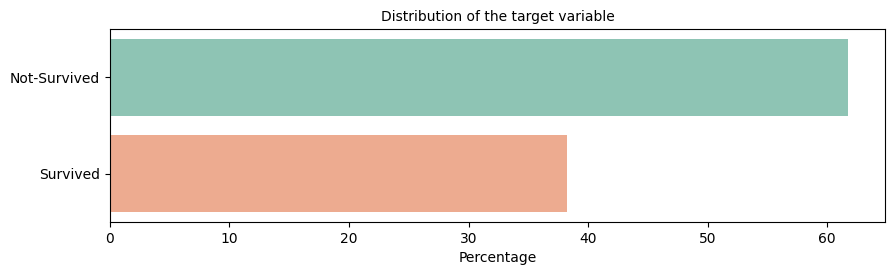

In [30]:
# Visualizing univariate characteristics of the Target variable
plt.figure(figsize= [10,2.5])
sns.barplot(y = ['Not-Survived','Survived'] ,  x = data["Survived"].value_counts(normalize =True)*100, palette ="Set2", alpha =0.8)
plt.xlabel('Percentage')
plt.title("Distribution of the target variable", fontdict = {"fontsize":10})
plt.show()

-  Approximately 60% of passengers did not survive the Titanic disaster.
-  Only around 40% of passengers survived.

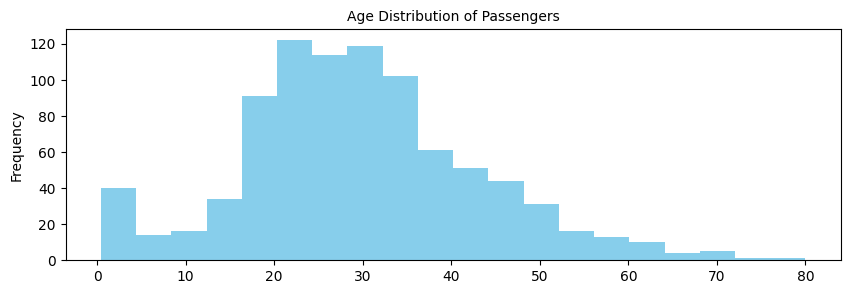

In [31]:
# to check distribution of Age
plt.figure(figsize = (10,3))
data['Age'].plot(kind='hist',bins=20 , color = "skyblue")
plt.title('Age Distribution of Passengers',fontdict = {"fontsize":10})
plt.ylabel('Frequency')
plt.show()

-  The distribution is right-skewed, meaning there are more younger passengers compared to older ones.
-  The majority of passengers are between the ages of 20 and 40.
-  There's a peak around the age of 22-32, indicating a significant number of passengers in this age group.

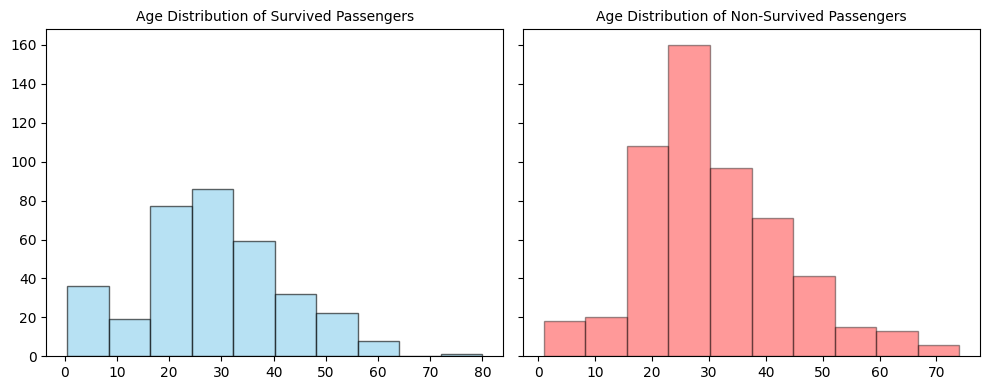

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Plot histogram for passengers who survived
axes[0].hist(data.loc[data['Survived'] == 1, 'Age'], bins=10, color='skyblue', alpha= 0.6, edgecolor='black')
axes[0].set_title("Age Distribution of Survived Passengers", fontdict = {"fontsize":10})

# Plot histogram for passengers who did not survive
axes[1].hist(data.loc[data['Survived'] == 0, 'Age'], bins=10, color='red', alpha=0.4, edgecolor='black')
axes[1].set_title("Age Distribution of Non-Survived Passengers", fontdict = {"fontsize":10})

plt.tight_layout()
plt.show()

-  Both histograms show a high frequency of passengers aged 20-30, but the number is higher among non-survived passengers.
-  The most notable peak in both histograms is around age 20 to 30, the distribution for survivors is slightly more spread out.

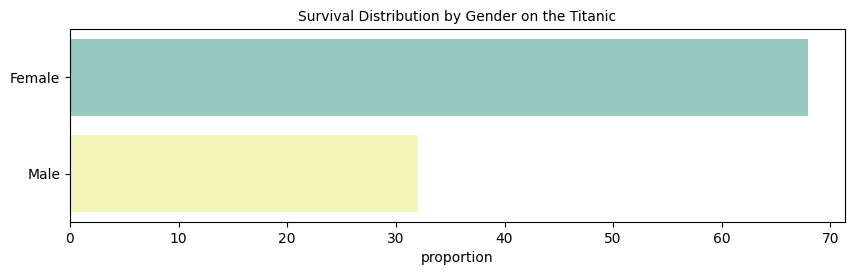

In [33]:
plt.figure(figsize= [10,2.5])
sns.barplot(y = ['Female','Male'] ,  x = data.loc[data['Survived'] == 1, 'Sex'].value_counts(normalize =True)*100, palette ="Set3")
plt.title('Survival Distribution by Gender on the Titanic', fontdict = {"fontsize":10})
plt.show()

-  A much higher proportion of female passengers survived compared to male passengers. This suggests that women had a significantly higher chance of survival.

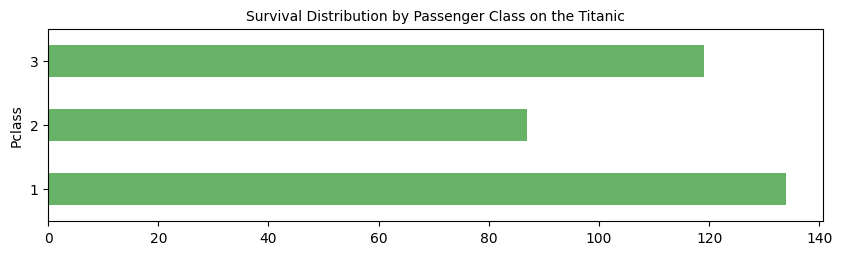

In [34]:
plt.figure(figsize= [10,2.5])
data.loc[data['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.barh(cmap="ocean", alpha=0.6)
plt.title('Survival Distribution by Passenger Class on the Titanic', fontdict = {"fontsize":10})
plt.show()

-  First-class passengers had a higher survival rate, suggesting a better chance of survival for this group.
-  Third-class passengers had a lower survival rate, although it's still higher than the second-class survival rate.

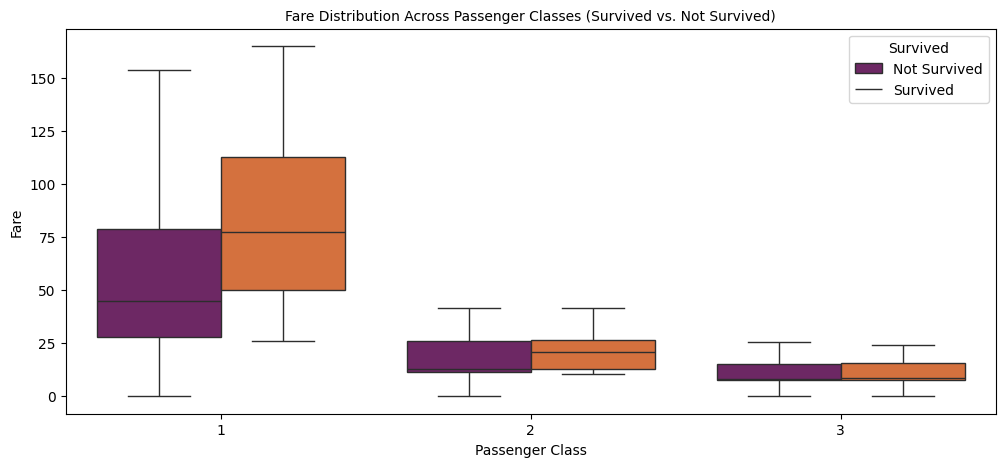

In [35]:
plt.figure(figsize=(12, 5))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data, palette='inferno', showfliers=False)

plt.title('Fare Distribution Across Passenger Classes (Survived vs. Not Survived)', fontdict = {"fontsize":10})
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

plt.show()

-  There's a clear relationship between fare and survival.  Passengers who paid higher fares (first-class passengers) had a higher chance of survival.
-  For Pclass 2 and 3, the fare distribution overlaps significantly between survivors and non-survivors. This suggests that fare, within these classes, might not be a strong predictor of survival.

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Q', 'S'],
      dtype='object')

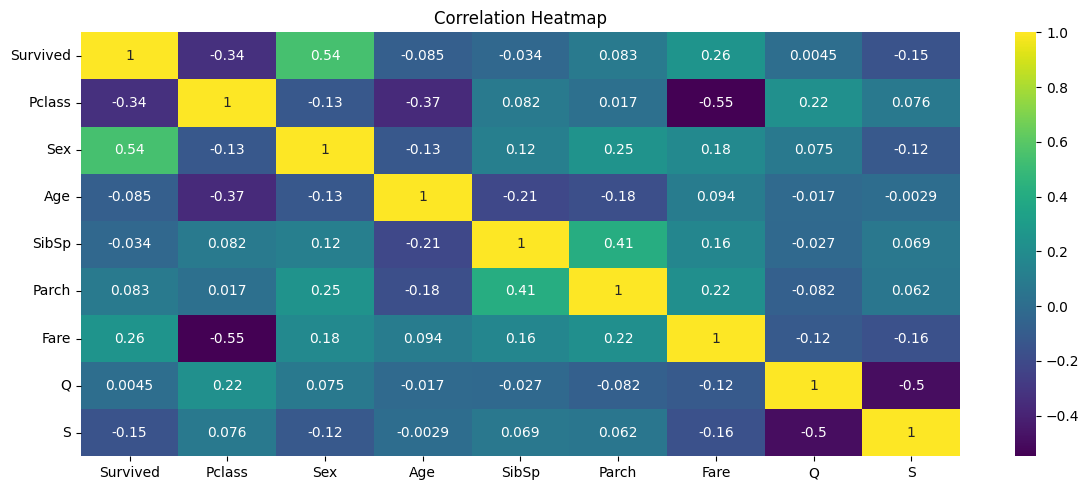

In [37]:
# correlation between few of the numerical variables w.r.t target variable
num_variables = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S']

plt.figure(figsize=(12, 5))
sns.heatmap(data[num_variables].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

-  Sex variable has a strong positive correlation w.r.t Survival, indicates that females were more likely to survive.
-  Fare has a moderate positive correlation suggests that higher fares were associated with higher survival rates, possibly due to better cabin locations and earlier access to lifeboats.
-  Pclass has a strong negative correlation indicates that lower-class passengers were less likely to survive. 
-  Age, SibSp, Parch, Embarkation Ports variables have weak or no correlation with survival, suggesting that other factors might have played a more significant role in determining survival outcomes for these variables.

In [38]:
# Feature engineering for Age and Fare
data['Age'] = pd.cut(data['Age'], bins=[0, 12, 18, 60, 80], labels=['Child', 'Teen', 'Adult', 'Senior'])

# create dummy variables
data = pd.get_dummies(data, columns=['Age'], drop_first=True, dtype= 'int')

In [39]:
# Binning Fare into categories 
data['Fare'] = pd.cut(data['Fare'], bins=[5, 55, 105, 155, 205, 555], labels=['Low', 'Medium', 'High', 'Very High', 'Extremely High'])

# create dummy variables
data = pd.get_dummies(data, columns=['Fare'], drop_first=True, dtype= 'int')

In [40]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Q,S,Age_Teen,Age_Adult,Age_Senior,Fare_Medium,Fare_High,Fare_Very High,Fare_Extremely High
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,0,1,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,0,0,0,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,0,1,0,1,0,0,0,0,0


In [41]:
data.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Q,S,Age_Teen,Age_Adult,Age_Senior,Fare_Medium,Fare_High,Fare_Very High,Fare_Extremely High
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,0.524184,0.382452,0.086614,0.724409,0.087739,0.811024,0.023622,0.094488,0.034871,0.002250,0.022497
std,256.998173,0.486260,0.834700,0.477538,1.103705,0.806761,0.281427,0.447063,0.283074,0.391710,0.151954,0.292671,0.183555,0.047404,0.148377
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Train_Test split

In [42]:
# remove the non-predicting features and the target variable
X = data.drop(['Survived','PassengerId','Name'], axis =1)

X.head(3)

,Pclass,Sex,SibSp,Parch,Q,S,Age_Teen,Age_Adult,Age_Senior,Fare_Medium,Fare_High,Fare_Very High,Fare_Extremely High
0,3,0,1,0,0,1,0,1,0,0,0,0,0
1,1,1,1,0,0,0,0,1,0,1,0,0,0
2,3,1,0,0,0,1,0,1,0,0,0,0,0


In [43]:
# storing the target vriable in y
y = data['Survived']

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3 , random_state = 100)

In [45]:
# check shape and size
print(X_train.shape)
print(X_test.shape)

(622, 13)
(267, 13)


In [46]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply scaler() to all the columns except the binary ones and 'dummy' variables, scaling ensures they contribute equally to the model
X_train[['Pclass', 'SibSp', 'Parch' ]] = scaler.fit_transform(X_train[['Pclass', 'SibSp', 'Parch']])

In [47]:
# Create a logistic regression model
logreg = LogisticRegression()

# Set up the hyperparameter grid
param_grid = {
    'penalty': ['l1'],  
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear'],  
    'max_iter': [100, 200, 300]}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Accuracy: 0.7974322580645161


In [48]:
# Best hyperparameters obtained from GridSearchCV
best_params = grid_search.best_params_

# Train the model using the best parameters
logreg_best = LogisticRegression(
    penalty=best_params['penalty'],
    C=best_params['C'],
    max_iter=best_params['max_iter'],
    solver=best_params['solver']
)

# instantiate RFE 
rfe = RFE(estimator=logreg_best, n_features_to_select=10)   
rfe = rfe.fit(X_train, y_train)  

In [49]:
# display names of columns that are selected
col = X_train.columns[rfe.support_]
col

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Q', 'S', 'Age_Teen', 'Age_Adult',
       'Age_Senior', 'Fare_Medium'],
      dtype='object')

In [50]:
X_train_sm = sm.add_constant(X_train[col])  # Add constant for intercept

# Use statsmodels Logit model 
logm = sm.Logit(y_train, X_train_sm)
result = logm.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.427390
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      611
Method:                           MLE   Df Model:                           10
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.3538
Time:                        22:41:24   Log-Likelihood:                -265.84
converged:                       True   LL-Null:                       -411.36
Covariance Type:            nonrobust   LLR p-value:                 1.207e-56
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7021      0.484      1.451      0.147      -0.246       1.650
Pclass         -0.8283    

In [51]:
# drop column
col = col.drop('S')

In [52]:
X_train_sm = sm.add_constant(X_train[col])  # Add constant for intercept

# Use statsmodels Logit model 
logm1 = sm.Logit(y_train, X_train_sm)
result = logm1.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.428115
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      612
Method:                           MLE   Df Model:                            9
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.3527
Time:                        22:41:24   Log-Likelihood:                -266.29
converged:                       True   LL-Null:                       -411.36
Covariance Type:            nonrobust   LLR p-value:                 3.195e-57
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5020      0.434      1.158      0.247      -0.348       1.352
Pclass         -0.8466    

In [53]:
# drop column
col = col.drop('Q')

In [54]:
X_train_sm = sm.add_constant(X_train[col])  # Add constant for intercept

# Use statsmodels Logit model 
logm2 = sm.Logit(y_train, X_train_sm)
result = logm2.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.428436
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      613
Method:                           MLE   Df Model:                            8
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.3522
Time:                        22:41:24   Log-Likelihood:                -266.49
converged:                       True   LL-Null:                       -411.36
Covariance Type:            nonrobust   LLR p-value:                 6.228e-58
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4945      0.432      1.144      0.253      -0.353       1.342
Pclass         -0.8638    

In [55]:
# drop column
col = col.drop('Parch')

In [56]:
X_train_sm = sm.add_constant(X_train[col])  # Add constant for intercept

# Use statsmodels Logit model 
logm3 = sm.Logit(y_train, X_train_sm)
result = logm3.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.430225
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      614
Method:                           MLE   Df Model:                            7
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.3495
Time:                        22:41:24   Log-Likelihood:                -267.60
converged:                       True   LL-Null:                       -411.36
Covariance Type:            nonrobust   LLR p-value:                 2.780e-58
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3541      0.423      0.838      0.402      -0.474       1.183
Pclass         -0.8613    

In [57]:
# calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]  
                                                                               
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
4,Age_Adult,1.57
1,Sex,1.54
6,Fare_Medium,1.34
0,Pclass,1.21
2,SibSp,1.14
3,Age_Teen,1.12
5,Age_Senior,1.03


In [58]:
y_train_pred = result.predict(X_train_sm)

In [59]:
y_train_pred[:10]

86     0.052947
889    0.417184
162    0.084496
760    0.084496
409    0.262494
867    0.417184
705    0.204475
59     0.076634
827    0.710932
42     0.084496
dtype: float64

In [60]:
# reshape
y_train_pred = y_train_pred.values.reshape(-1) # convert numpy array to 1D array
y_train_pred[:10]

array([0.05294738, 0.41718388, 0.08449632, 0.08449632, 0.26249444,
       0.41718388, 0.20447517, 0.07663418, 0.71093215, 0.08449632])

In [61]:
# create DataFrame
y_train_pred_final = pd.DataFrame({'Survived': y_train.values, 'Survived_probability': y_train_pred})

In [62]:
# add new column to the dataframe and show index number
y_train_pred_final['Index_ID'] = y_train.index

In [63]:
y_train_pred_final.head(10)

,Survived,Survived_probability,Index_ID
0,0,0.052947,86
1,1,0.417184,889
2,0,0.084496,162
3,0,0.084496,760
4,0,0.262494,409
5,0,0.417184,867
6,0,0.204475,705
7,0,0.076634,59
8,1,0.710932,827
9,0,0.084496,42


In [64]:
# create empty Dataframe for columns cutoff values, accuracy, sensitivity and specificity
cutoff_df = pd.DataFrame(columns = ['Prob_cutoffs', 'accuracy', 'sensitivity', 'specificity'])

In [65]:
# List of cutoff values
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    # Create binary predictions temporarily for the current cutoff
    temp_pred = (y_train_pred_final['Survived_probability'] >= i).astype(int)

    # Calculate the confusion matrix
    cm_1 = metrics.confusion_matrix(y_train_pred_final['Survived'], temp_pred)

    # Calculate metrics
    total_1 = sum(sum(cm_1))  # Total number of instances
    accuracy = (cm_1[0, 0] + cm_1[1, 1]) / total_1
    sensitivity = cm_1[1, 1] / (cm_1[1, 0] + cm_1[1, 1]) if (cm_1[1, 0] + cm_1[1, 1]) != 0 else 0
    specificity = cm_1[0, 0] / (cm_1[0, 0] + cm_1[0, 1]) if (cm_1[0, 0] + cm_1[0, 1]) != 0 else 0

    # Add the results to the DataFrame
    cutoff_df.loc[len(cutoff_df)] = [i, accuracy, sensitivity, specificity]

# Display the metrics for all cutoffs
print(cutoff_df)

   Prob_cutoffs  accuracy  sensitivity  specificity
0           0.0  0.374598     1.000000     0.000000
1           0.1  0.660772     0.905579     0.514139
2           0.2  0.717042     0.892704     0.611825
3           0.3  0.786174     0.858369     0.742931
4           0.4  0.784566     0.824034     0.760925
5           0.5  0.805466     0.686695     0.876607
6           0.6  0.805466     0.549356     0.958869
7           0.7  0.805466     0.523605     0.974293
8           0.8  0.774920     0.424893     0.984576
9           0.9  0.710611     0.240343     0.992288


In [66]:
# create a new column and put a randomt threshold value to classify
y_train_pred_final['Survival_pred'] = y_train_pred_final['Survived_probability'].map(lambda x: 1 if x>0.45 else 0)
y_train_pred_final.head()

,Survived,Survived_probability,Index_ID,Survival_pred
0,0,0.052947,86,0
1,1,0.417184,889,0
2,0,0.084496,162,0
3,0,0.084496,760,0
4,0,0.262494,409,0


In [67]:
confusion = metrics.confusion_matrix(y_train_pred_final['Survived'], y_train_pred_final['Survival_pred'])
print(confusion)

[[327  62]
 [ 60 173]]


In [68]:
print(metrics.accuracy_score(y_train_pred_final['Survived'], y_train_pred_final['Survival_pred']))

0.8038585209003215


In [69]:
# define true positive/negative and false positive/negative
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [70]:
# calculate Sensitivity
print('Sensitivity:', TP/float(TP+FN))

Sensitivity: 0.7424892703862661


In [71]:
#calculate Specificity
print('Specificity:', TN/float(TN+FP))

Specificity: 0.8406169665809768


In [72]:
# plot ROC curve to show tradeoff between TPR and FPR
def draw_roc(actual, prob):
    fpr,tpr,thresholds = metrics.roc_curve(actual, prob, drop_intermediate = False) # drop_intermediate =False so it returns thresholds even where TPR and FPR have same values
    auc_score = metrics.roc_auc_score(actual,prob) # area under the curve
    
    plt.figure(figsize = [5,5])
    plt.plot(fpr,tpr,label = 'ROC Curve (area = %0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')            # plot random classifier for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate/ [1 - Specificity]')
    plt.ylabel('True Positive Rate/ Sensitivity')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = "lower right")
    plt.show()
    
    return None

In [73]:
# calculate FPR, TPR and thresholds using actual converted values and predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Survived'], y_train_pred_final['Survived_probability'], 
                                         drop_intermediate = False)

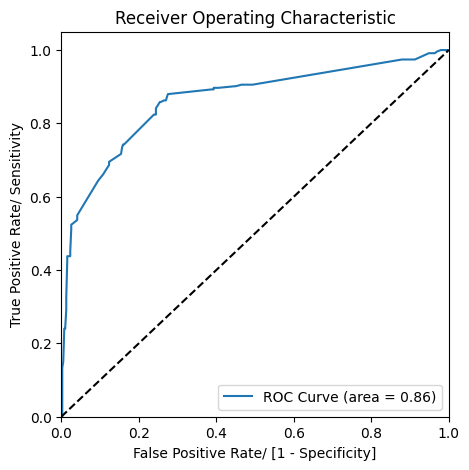

In [74]:
draw_roc(y_train_pred_final['Survived'], y_train_pred_final['Survived_probability'])

In [75]:
# Precision indicates the accuracy of the positive predictions
precision_score(y_train_pred_final['Survived'], y_train_pred_final['Survival_pred'])

0.7361702127659574

In [76]:
# Recall measures how many of the actual positive cases were correctly predicted
recall_score(y_train_pred_final['Survived'], y_train_pred_final['Survival_pred'])

0.7424892703862661

In [77]:
# Apply scaler() to all the columns except the binary ones and 'dummy' variables, scaling ensures they contribute equally to the model
X_test[['Pclass', 'SibSp', 'Parch' ]] = scaler.transform(X_test[['Pclass', 'SibSp', 'Parch']])

In [78]:
# match columns
X_test = X_test[col]

In [79]:
X_test.head()

,Pclass,Sex,SibSp,Age_Teen,Age_Adult,Age_Senior,Fare_Medium
639,0.844978,0,0.422894,0,1,0,0
147,0.844978,1,1.317589,0,0,0,0
278,0.844978,0,3.106978,0,0,0,0
484,-1.533195,0,0.422894,0,1,0,1
770,0.844978,0,-0.471800,0,1,0,0


In [80]:
# add constant
X_test_sm = sm.add_constant(X_test)

In [81]:
y_test_pred = result.predict(X_test_sm)

In [82]:
# convert to DataFrame
y_pred_df = pd.DataFrame(y_test_pred) 
y_pred_df[:10]

,0
639,0.054387
147,0.845321
278,0.117529
484,0.563181
770,0.084496
874,0.718502
157,0.084496
660,0.217513
792,0.088156
533,0.588415


In [83]:
# convert test into DataFrame
y_test_df = pd.DataFrame(y_test)            
y_test_df['Index_ID'] = y_test_df.index

In [84]:
# reset index 
y_pred_df.reset_index(drop= True, inplace =True)
y_test_df.reset_index(drop= True, inplace =True)

In [85]:
# append above test and predicted df
y_pred_final= pd.concat([y_test_df, y_pred_df], axis =1)
y_pred_final.head()

,Survived,Index_ID,0
0,0,639,0.054387
1,0,147,0.845321
2,0,278,0.117529
3,1,484,0.563181
4,0,770,0.084496


In [86]:
# rename the column title
y_pred_final = y_pred_final.rename(columns = {0 : 'Survival_probability'})

# rearrange the columns
y_pred_final = y_pred_final.reindex(['Index_ID','Survived','Survival_probability'], axis = 1)
y_pred_final.head()

,Index_ID,Survived,Survival_probability
0,639,0,0.054387
1,147,0,0.845321
2,278,0,0.117529
3,484,1,0.563181
4,770,0,0.084496


In [87]:
# create new column and cutoff at 0.45
y_pred_final['Survival_predicted'] = y_pred_final.Survival_probability.map(lambda x: 1 if x > 0.45 else 0)

y_pred_final.head()

,Index_ID,Survived,Survival_probability,Survival_predicted
0,639,0,0.054387,0
1,147,0,0.845321,1
2,278,0,0.117529,0
3,484,1,0.563181,1
4,770,0,0.084496,0


In [88]:
# check accuracy score
print('Accuracy score:', metrics.accuracy_score(y_pred_final['Survived'], y_pred_final['Survival_predicted']))

Accuracy score: 0.8089887640449438


In [89]:
# Calculate F1 score
f1 = f1_score(y_pred_final['Survived'], y_pred_final['Survival_predicted'])
print('F1 score:', f1)

F1 score: 0.7559808612440191


In [90]:
precision_score(y_pred_final['Survived'], y_pred_final['Survival_predicted'])

0.7745098039215687

In [91]:
passenger_info = data.loc[y_pred_final['Index_ID'], ['PassengerId', 'Name','Sex','Pclass']]

# Reset the index to match y_pred_final
passenger_info.reset_index(drop=True, inplace=True)

# merge passenger info with y_pred_final
y_pred_final_with_info = pd.concat([y_pred_final, passenger_info], axis=1)

y_pred_final_with_info.head(5)

,Index_ID,Survived,Survival_probability,Survival_predicted,PassengerId,Name,Sex,Pclass
0,639,0,0.054387,0,640,"Thorneycroft, Mr. Percival",0,3
1,147,0,0.845321,1,148,"Ford, Miss. Robina Maggie ""Ruby""",1,3
2,278,0,0.117529,0,279,"Rice, Master. Eric",0,3
3,484,1,0.563181,1,485,"Bishop, Mr. Dickinson H",0,1
4,770,0,0.084496,0,771,"Lievens, Mr. Rene Aime",0,3


### Model Summary
`Train Set`
-  Accuracy: 0.80
-  Sensitivity (Recall): 0.74
-  Specificity: 0.84
-  ROC-AUC: 0.86

    
`Test Set`
-  Accuracy: 0.80
-  F1-Score: 0.75
-  Precision: 0.77</br>
</br>
-  The model achieves consistent accuracy on both the train and test sets, indicating it generalizes well without significant overfitting.
-  Precision (0.77) among the predicted positives, 77% are true positives, which is a solid performance in identifying relevant cases.
-  With F1-Score (0.75), it balances precision and recall, suggesting that the model maintains reasonable trade-offs without excessively favoring one metric over the other.